In [1]:
import json
import numpy as np
import pandas as pd
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from pyrouge import Rouge155

In [2]:
data = []
with open('train.01.jsonl') as f:
    for line in f:
        data.append(json.loads(line))

In [3]:
type(data)

list

In [4]:
import sys
pd.set_option("display.max_colwidth", 0)
np.set_printoptions(threshold=sys.maxsize)

In [5]:
print(data[0]['paragraphs'][1])

[['Lula', 'menuturkan', ',', 'sakit', 'itu', 'membuat', 'Ryan', 'mesti', 'vakum', 'dari', 'semua', 'kegiatannya', ',', 'termasuk', 'menjadi', 'pembawa', 'acara', 'Dokter', 'Oz', 'Indonesia', '.'], ['Kondisi', 'itu', 'membuat', 'Ryan', 'harus', 'kembali', 'ke', 'kampung', 'halamannya', 'di', 'Pekanbaru', ',', 'Riau', 'untuk', 'menjalani', 'istirahat', '.']]


In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data)
df

category  \
0      tajuk utama   
1      teknologi     
2      hiburan       
3      tajuk utama   
4      tajuk utama   
...            ...   
14257  tajuk utama   
14258  olahraga      
14259  tajuk utama   
14260  olahraga      
14261  teknologi     

                                                                                                                                                                                                                                                                                                             gold_labels  \
0      [[False, True], [True, True], [False, False, False], [False, False], [False, False], [False, False], [False, False], [False], [False, False]]                                                                                                                                                                       
1      [[False, False, False, False], [False, True, True], [False, False, True], [False, False, False, False], [False, False], [False, False, False], [False, False], [False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False, False], [False, False], [False, False]]   
2      [[True], [True], [False, False], [False], [False], [False], [False], [False, False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False], [False, False], [False, False]]                                                                                             
3      [[True, True], [False, False, False], [True], [False, False], [False, False, False]]                                                                                                                                                                                                                                
4      [[False, True], [True, True, True], [False], [False, False], [False, False], [False], [False, False]]                                                                                                                                                                                                               
...                                                                                                      ...                                                                                                                                                                                                               
14257  [[True], [True], [False], [False, False], [False], [False], [False], [False, False], [False], [False], [False]]                                                                                                                                                                                                     
14258  [[True, True], [True, False], [False], [False, False], [False, False], [False], [False, False, False], [False, False, False, False], [False, False, False], [False, False], [False, False], [False, False]]                                                                                                         
14259  [[True], [False, False], [True, True, False], [False, False], [False, False], [False, False], [False, False]]                                                                                                                                                                                                       
14260  [[True, True], [True, True], [False, False], [False, False, False], [False, False], [False, False]]                                                                                                                                                                                                                 
14261  [[True, False], [False, False, False, False, False], [False, False], [True, False, False], [True, False, False, False, False], [False, False], [False], [False, False]]                                                                                               

In [8]:
article = df.paragraphs[2]
ref_sum = df.summary[2]

In [9]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(ref_sum[0])

'Dinas Pariwisata Provinsi Bengkulu kembali menggelar kegiatan Bimbingan Teknis (Bimtek) SDM Kepariwisataan dalam menyongson " Visit 2020 Wonderful Bengkulu " pada 8 - 10 November 2017 yang lalu.'

In [10]:
import re
def untokenize(words):
    """
    Untokenizing a text undoes the tokenizing operation, restoring
    punctuation and spaces to the places that people expect them to be.
    Ideally, `untokenize(tokenize(text))` should be identical to `text`,
    except for line breaks.
    """
    text = ' '.join(words)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

untokenize(article[0][0])

'Jakarta, CNN Indonesia - - Dinas Pariwisata Provinsi Bengkulu kembali menggelar kegiatan Bimbingan Teknis (Bimtek) SDM Kepariwisataan dalam menyongson " Visit 2020 Wonderful Bengkulu ".'

In [11]:
sentences_list = []
for paragraph in article:
    for sentence in paragraph:
        sentences_list.append(TreebankWordDetokenizer().detokenize(sentence))
    #sentence_list.append(TreebankWordDetokenizer().detokenize(sentence)

ref_sentences_list =[]
for sentence in ref_sum:
    ref_sentences_list.append(TreebankWordDetokenizer().detokenize(sentence))

In [12]:
for i in sentences_list:
    print(i)
print('\n\n\n')
for i in ref_sentences_list:
    print(i)

Jakarta, CNN Indonesia - - Dinas Pariwisata Provinsi Bengkulu kembali menggelar kegiatan Bimbingan Teknis (Bimtek) SDM Kepariwisataan dalam menyongson " Visit 2020 Wonderful Bengkulu ".
Kegiatan yang berlangsung pada 8 hingga 10 November kemarin tersebut sebagai bagian dari upaya Pemerintah Provinsi Bengkulu dalam
Hadir sebagai pemateri kegiatan pada 8 - 10 November itu adalah Plt.
Asdep Strategi Pemasaran Pariwisata Nusantara, Deputi Bidang Pengembangan Pemasaran Pariwisata Nusantara Hariyanto serta perwakilan dari Deputi Bidang Pengembangan Kelembagaan Kementerian Pariwisata, Faizal.
Kepala Dinas Pariwisata Provinsi Bengkulu Yudi Satria mengatakan, kegiatan Bimtek diikuti 250 peserta yang terdiri dari aparatur Pemerintah Provinsi, ASN Kabupaten / Kota, Kelompok Sadar Wisata serta pihak terkait sektor pariwisata di Bengkulu.
" Kegiatan ini dimaksudkan untuk memberikan pembekalan kepada peserta di bidang kepariwisataan, " ujar Yudi Satria.
Ia mengatakan, Pemprov telah menetapkan pariwi

In [13]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [14]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <25x254 sparse matrix of type '<class 'numpy.int64'>'
	with 472 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['10', '2020', '250', '52', 'acara', 'adalah', 'agar', 'ajang', 'akan', 'alam', 'andal', 'andalan', 'aparatur', 'arah', 'arief', 'asdep', 'asn', 'astuti', 'atau', 'atraksi', 'bagaimana', 'bagian', 'bahwa', 'baik', 'bengkulu', 'benteng', 'berhadapan', 'berkomitmen', 'berlangsung', 'berperan', 'bersih', 'bertujuan', 'besar', 'bidang', 'bimbingan', 'bimtek', 'bisa', 'budaya', 'bumi', 'bung', 'cara', 'class', 'cnn', 'daerah', 'dalam', 'dan', 'dari', 'daring', 'daya', 'dengan', 'depan', 'deputi', 'destinasi', 'di', 'dia', 'didalamnya', 'digelar', 'digital', 'diikuti', 'dikembangkan', 'dikenal', 'dimaksudkan', 'dinas', 'diperhatikan', 'dirancang', 'disinkronkan', 'ditambah', 'diwujudkan', 'dukung', 'dunia', 'efektivitas', 'ekonomi', '

In [15]:
print(cv_matrix.toarray())

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1
  0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [16]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.19830243 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.2424317  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26690421 0.17311109
  0.         0.         0.         0.         0.         0.
  0.26690421 0.         0.14640719 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.21500897 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.26690421
  0.         0.         0.26690421 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.16311373 0.         

In [17]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph

<bound method _cs_matrix.toarray of <254x25 sparse matrix of type '<class 'numpy.float64'>'
	with 472 stored elements in Compressed Sparse Column format>>


Number of edges 279
Number of vertices 25


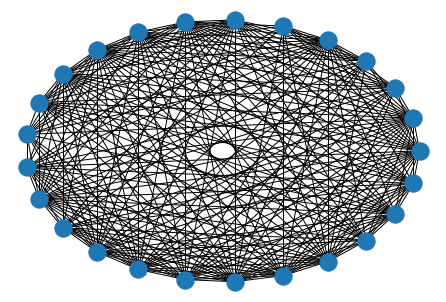

The memory used by the graph in Bytes is: 48


In [18]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [19]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 1176
0 0.04352043738715286
1 0.04222032891262403
2 0.03299247158869316
3 0.03531221337980939
4 0.04544109701174873
5 0.03479988781661284
6 0.047654787486194485
7 0.0459231585774513
8 0.04686347809786084
9 0.04507764085476793
10 0.04548671453951963
11 0.04108599546906145
12 0.027911484778964765
13 0.03524648011372381
14 0.0438727137850633
15 0.03490045302282164
16 0.04521410421576507
17 0.03656125814983443
18 0.037305600318457845
19 0.04673843564806421
20 0.036053090196779
21 0.0490972238199062
22 0.03704104072300314
23 0.03287419320600166
24 0.030805710900118157


In [20]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [21]:
print(sentence_array)

[['0.0490972238199062'
  'Menteri Pariwisata Arief Yahya mengapresiasi kegiatan Bimtek sebagai salah satu upaya dan komitmen dari Pemerintah Provinsi Bengkulu dalam mewujudkan pariwisata sebagai salah satu sektor utama.']
 ['0.047654787486194485'
  'Ia mengatakan, Pemprov telah menetapkan pariwisata sebagai salah satu sektor yang akan dikembangkan dan akan menjadi sektor unggulan dalam meningkatkan pertumbuhan ekonomi daerah serta masyarakat.']
 ['0.04686347809786084'
  '" Karena itu pula Pemprov telah menetapkan program\' Visit 2020 Wonderful Bengkulu " yang akan menjadi tujuan besar pariwisata Bengkulu.']
 ['0.04673843564806421'
  'Deputi Pengembangan Pemasaran Pariwisata Nusantara, Esthy Reko Astuti mengatakan, Bimtek kali ini juga bertujuan memberi perspektif dan arah yang sama tentang program promosi Pariwisata di Bengkulu.']
 ['0.0459231585774513'
  'Hal itu, jelas Yudi, tidak lepas dari potensi pariwisata di Bengkulu yang besar memiliki kekayaan alam yang indah serta budaya yang

In [22]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

print(rank_max)
print(rank_min)

0.0490972238199062
0.027911484778964765


In [23]:
temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))


25


In [24]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [25]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [26]:
model = sentence_list

In [27]:
for lines in sentence_list:
    print(lines)

Menteri Pariwisata Arief Yahya mengapresiasi kegiatan Bimtek sebagai salah satu upaya dan komitmen dari Pemerintah Provinsi Bengkulu dalam mewujudkan pariwisata sebagai salah satu sektor utama.
Ia mengatakan, Pemprov telah menetapkan pariwisata sebagai salah satu sektor yang akan dikembangkan dan akan menjadi sektor unggulan dalam meningkatkan pertumbuhan ekonomi daerah serta masyarakat.
" Karena itu pula Pemprov telah menetapkan program' Visit 2020 Wonderful Bengkulu " yang akan menjadi tujuan besar pariwisata Bengkulu.
Deputi Pengembangan Pemasaran Pariwisata Nusantara, Esthy Reko Astuti mengatakan, Bimtek kali ini juga bertujuan memberi perspektif dan arah yang sama tentang program promosi Pariwisata di Bengkulu.
Hal itu, jelas Yudi, tidak lepas dari potensi pariwisata di Bengkulu yang besar memiliki kekayaan alam yang indah serta budaya yang tinggi.
Selain itu, dalam menunjang proses' Visit 2020 Wonderful Bengkulu', Pemprov juga telah menyiapkan 52 acara yang akan digelar dalam sat

In [28]:
ori_article = ' '.join(map(str, sentences_list))
gen_sum = ' '.join(map(str, sentence_list))
ref_sum = ' '.join(map(str, ref_sentences_list))

In [29]:
print("-----------------------------------------------------")
print("Original article")
print(ori_article)
print("-----------------------------------------------------")
print("Original summary")
print(ref_sum)
print("-----------------------------------------------------")
print("Generated summary")
print(gen_sum)
print("-----------------------------------------------------")

-----------------------------------------------------
Original article
Jakarta, CNN Indonesia - - Dinas Pariwisata Provinsi Bengkulu kembali menggelar kegiatan Bimbingan Teknis (Bimtek) SDM Kepariwisataan dalam menyongson " Visit 2020 Wonderful Bengkulu ". Kegiatan yang berlangsung pada 8 hingga 10 November kemarin tersebut sebagai bagian dari upaya Pemerintah Provinsi Bengkulu dalam Hadir sebagai pemateri kegiatan pada 8 - 10 November itu adalah Plt. Asdep Strategi Pemasaran Pariwisata Nusantara, Deputi Bidang Pengembangan Pemasaran Pariwisata Nusantara Hariyanto serta perwakilan dari Deputi Bidang Pengembangan Kelembagaan Kementerian Pariwisata, Faizal. Kepala Dinas Pariwisata Provinsi Bengkulu Yudi Satria mengatakan, kegiatan Bimtek diikuti 250 peserta yang terdiri dari aparatur Pemerintah Provinsi, ASN Kabupaten / Kota, Kelompok Sadar Wisata serta pihak terkait sektor pariwisata di Bengkulu. " Kegiatan ini dimaksudkan untuk memberikan pembekalan kepada peserta di bidang kepariwisat

In [30]:
import nltk
nltk.download('punkt')
nltk_tokens = nltk.sent_tokenize(gen_sum)
print(nltk_tokens[])

SyntaxError: invalid syntax (<ipython-input-30-a08daa69bedf>, line 4)

In [ ]:
from rouge import Rouge 

rouge = Rouge()
scores = rouge.get_scores(gen_sum, ref_sum)
scores

In [ ]:
rouge = Rouge()
scores = rouge.get_scores(ref_sum, ref_sum)
scores